# Построение графиков разложения функции в ряд Фурье #

Шаг 1. Импортируем необходимые библиотеки.

In [1]:
import numpy as np  # для работы с массивами
import matplotlib.pyplot as plt  # для построения графиков

Шаг 2. Зададим нашу функцию $y=\begin{cases} 0, & -\pi<x<0, \\  1,&  0<x<\pi.\end{cases}$, с периодом $l=2\pi$.

In [2]:
def y(t,N):
    # функция принимает два параметра:
    # t - число рассматриваемых периодов
    # N - число точек в одном периоде [-pi,pi]
    x_0=np.linspace(-np.pi,np.pi,N) # генерируем массив из N точек со значениями от -pi до pi
    y_zeros=np.zeros(N//2) # создаём массив нулей размерности N//2, что соответствует первой половине периода
    y_ones=np.ones(N//2) # создаём массив единиц размерности N//2, что соответствует второй половине периода
    y_0=np.concatenate((y_zeros,y_ones)) # объединение массивов нулей и единиц, получаем массив из N точек
    x=np.linspace(-np.pi*t,np.pi*t,N*t) # генерируем массив "иксов" с учётом требуемого числа периодов
    y=list(y_0)*t # переводим массив в список и дублируем t раз, [1,2]*3=[1,2,1,2,1,2]
    y=np.array(y) # переводим полученный список обратно в массив
    return x,y # возвращаем полученные массивы

x,y=y(3,1000) # вызываем нашу функцию с параметрами t=3 периода, N=1000 точек в каждом периоде

Шаг 3. Построим график функции для трёх периодов.

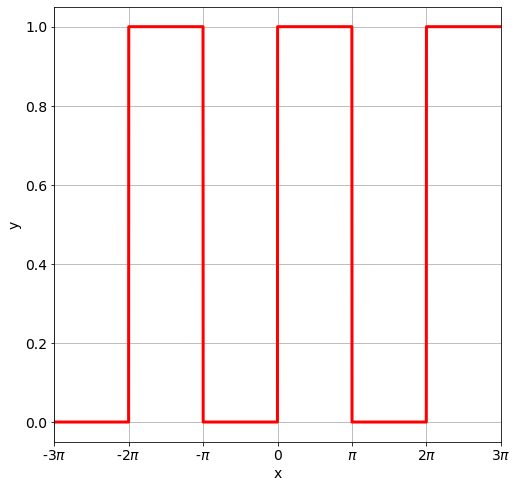

In [3]:
# настройки отображения
plt.figure(figsize=(8,8)) # настраиваем размер графика в дюймах
plt.rcParams.update({'font.size': 14}) # указываем, что размер шрифта на графике должен быть 14pt
plt.xlabel('x') # подписываем оси
plt.ylabel('y')
points = np.array([-3*np.pi, -2*np.pi, -np.pi, 0,  np.pi, 2*np.pi,3*np.pi]) # создаём вспомогательный массив, для новых меток оси "иксов"
labels = [r'-$3\pi$', r'-$2\pi$',r'-$\pi$', '$0$',r'$\pi$', r'$2\pi$',r'$3\pi$'] # создаём массив значений меток через r-строки и LaTeX
plt.xticks(points, labels) # непосредственно настраиваем метки оси "иксов"
plt.grid() # выводим сетку
plt.xlim(-3*np.pi,3*np.pi) # настраиваем область отображения, чтобы не было обрывов графика по краям

#построение графика
plt.plot(x,y,lw=3,color='red') # непосредственно строим график функции, на вход подаём массивы "иксов" и "игреков", 
                               # а также дополнительно указываем толщину линии и цвет
plt.show() # показываем график

Шаг 4. Посчитаем частичные суммы ряда
$$S(x)=\frac{1}{2}+\frac{2}{\pi}\sum\limits_{m=1}^{\infty}\frac{\sin\left(\left(2m-1\right)x\right)}{2m-1}.$$

Зададим функцию для вычисления выражения под суммой 
$$\mathrm{func}(x,m)=\frac{\sin\left(\left(2m-1\right)x\right)}{2m-1}.$$

In [4]:
def func(x, m):
    # вспомогательная функция, которая вычисляет выражение внутри суммы
    # входные параметры: x - массив иксов, m - значение счётчика суммы m
    return np.sin((2*m-1)*x)/(2*m-1)

Зададим функцию для вычисления частичной суммы
$$\mathrm{Fourier\_series}(x,k)=\frac{1}{2}+\frac{2}{\pi}\sum\limits_{m=1}^{k}\mathrm{func(x,m)}.$$

In [5]:
def Fourier_series(x,k):
    # функция вычисляет частичную сумму ряда
    s=0 # объявляем переменную суммы
    for m in range(1,k+1): # проходим циклом по значениям m
        s+=func(x,m) # обновляем s, добавляя вычисленное значение слагаемого при текущем значении m
    return 1/2+2*s/np.pi # добавляем 1/2 и умножаем на коэффициент

Шаг 5. Построим графики частичных сумм.

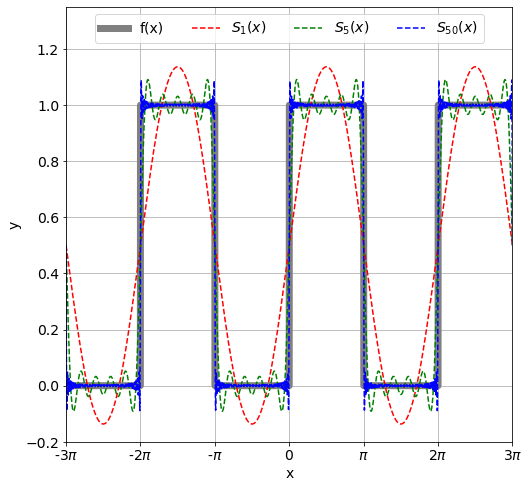

In [6]:
# настройки отображения 
plt.figure(figsize=(8,8)) # настраиваем размер графика в дюймах
plt.rcParams.update({'font.size': 14}) # указываем, что размер шрифта на графике должен быть 14pt
plt.xlabel('x') # подписываем оси
plt.ylabel('y')
points = np.array([-3*np.pi, -2*np.pi, -np.pi, 0,  np.pi, 2*np.pi,3*np.pi]) # создаём вспомогательный массив, для новых меток оси "иксов"
labels = [r'-$3\pi$', r'-$2\pi$',r'-$\pi$', '$0$',r'$\pi$', r'$2\pi$',r'$3\pi$'] # создаём массив значений меток через r-строки и LaTeX
plt.xticks(points, labels) # непосредственно настраиваем метки оси "иксов"
plt.grid() # выводим сетку
plt.xlim(-3*np.pi,3*np.pi) # настраиваем область отображения "иксов", чтобы не было обрывов графика по краям
plt.ylim(-0.2,1.35) # настраиваем область отображения "игреков", чтобы уместилась легенда

# построение графиков
plt.plot(x,y,lw=7,color='gray',label='f(x)') # непосредственно строим график функции, на вход подаём массивы "иксов" и "игреков", 
                                             # а также дополнительно указываем толщину линии и цвет

plt.plot(x,Fourier_series(x,1),label=r'$S_1(x)$',color='red',ls='--') # строим частичные суммы
plt.plot(x,Fourier_series(x,5),label=r'$S_5(x)$',color='green',ls='--')
plt.plot(x,Fourier_series(x,50),label=r'$S_{50}(x)$',color='blue',ls='--')

plt.legend(ncol=4,loc='upper center') # настраиваем отображение легенды

# plt.savefig('Fourier_series.eps',format='eps') # сохраняем в векторном формате

plt.show() # показываем график